# First Setup

In [ ]:
import time
import anki_vector
from anki_vector.util import degrees, distance_mm, speed_mmps, Angle, Pose

Setup and connect to robot

In [ ]:
robot = anki_vector.Robot(ip="192.168.0.17",
                       show_viewer=True,
                       show_3d_viewer=True,
                       enable_face_detection=True,
                       enable_custom_object_detection=True,
                       enable_nav_map_feed=True)



In [ ]:
robot.connect()


Test connection

In [ ]:
robot.behavior.say_text("Hello")

Test proximity sensor

In [ ]:
distance = robot.proximity.last_sensor_reading.distance
print ("Distance: ", distance)
print ("Distance (mm): ", distance.distance_mm)

Stop 5cm in front of obstacle

In [ ]:
robot.behavior.drive_straight(distance_mm(100), speed_mmps(100))

In [ ]:
while robot.proximity.last_sensor_reading.distance.distance_mm > 100:
  print(robot.proximity.last_sensor_reading.distance.distance_mm)
  robot.behavior.drive_straight(distance_mm(30), speed_mmps(100))
print ("Fertig! Abstand: ", robot.proximity.last_sensor_reading.distance.distance_mm)

Automatisches Abstand halten zur Wand

In [ ]:
robot.behavior.turn_in_place(degrees(-90))
ref_distance = robot.proximity.last_sensor_reading.distance.distance_mm
robot.behavior.turn_in_place(degrees(90))
print (ref_distance)

    
while 1:
  robot.behavior.drive_straight(distance_mm(100), speed_mmps(150))
  robot.behavior.turn_in_place(degrees(-90))
  distance = robot.proximity.last_sensor_reading.distance.distance_mm
  print (distance)
    
  if ((ref_distance - distance)>0):
    robot.behavior.turn_in_place(degrees(93))
  else:
    robot.behavior.turn_in_place(degrees(87))

In [ ]:
robot.motors.stop_all_motors()

Read map

In [ ]:
# Map initialisieren
robot.enable_nav_map_feed=True

#navMap = robot.nav_map.NavMapComponent

robot.nav_map.init_nav_map_feed(frequency=0.5)
latest_nav_map = robot.nav_map.latest_nav_map

# Roboter einmal drehen
#robot.behavior.turn_in_place(degrees(360))
robot.behavior.look_around_in_place()

print ("Map:", latest_nav_map)
print ("Size: ", latest_nav_map.size)
print ("Pose of robot", robot.pose)
print ("X, Y coordinates: ", robot.pose.position.x, robot.pose.position.y)

x = robot.pose.position.x
y = robot.pose.position.y

x = 1

print ("Printing all objects right of robot: ")
while x < 150:
    print (latest_nav_map.get_content(x, y))
    x = x + 1

Karte über openGL auslesen

In [ ]:
#args = anki_vector.util.parse_command_args()
with anki_vector.Robot( show_viewer=True,
                        show_3d_viewer=True,
                        enable_face_detection=True,
                        enable_custom_object_detection=True,
                        enable_nav_map_feed=True):
    print("Starting 3D Viewer. Use Ctrl+C to quit.")

In [53]:
def distance():
    return int(robot.proximity.last_sensor_reading.distance.distance_mm)

In [54]:
def moveForward(dist):
    i = 0
    robot.motors.set_wheel_motors(200, 200)
    while i < dist and distance() >= 180:
        i += 1
        time.sleep(0.1)
    robot.motors.stop_all_motors()

In [55]:
def correctStraigthPath():
    DegreesCorrectStraightPath = 0
    if (distance() < 100):
        robot.behavior.turn_in_place(degrees((-90 - DegreesCorrectStraightPath)))
    else:
        robot.behavior.turn_in_place(degrees((-90 + DegreesCorrectStraightPath))) 

In [83]:
def pledge():
    counter = 100 # !! just for testing !!
    oldCounter = 100
    
    # Constants
    IntervallCheckingDistanceToWall = 3
    
    if (distance() >= 200 and counter == 0):
        while (distance() >= 150):
            robot.motors.set_wheel_motors(200, 200)
            oldCounter = counter
        else:
            robot.motors.stop_all_motors()

    if (distance() < 200):
        robot.behavior.turn_in_place(degrees(-90))
        counter = counter + 1

    if (distance() >= 200 and counter != 0):  
        if oldCounter != counter: 
            avoidObstacleAfterTurn()
            
        moveForward(IntervallCheckingDistanceToWall)
        oldCounter = counter
        robot.behavior.turn_in_place(degrees(90))
        # Checking distance to wall
        if (distance() < 200):
            correctStraigthPath()
            oldCounter = counter
        else:
            counter = counter - 1

In [34]:
pledge()

In [ ]:
# robot.behavior.say_text("Connected")
#     robot.viewer.show()
#   robot.viewer_3d.show()
robot.behavior.say_text("tt coming home")

print("connected---------------------------------------------------------------")
battery_state = robot.get_battery_state()
print("Robot battery Level: {0}".format(battery_state.battery_level))

robot.behavior.set_head_angle(degrees(-5.0))
print("Head Angle Set")
robot.behavior.set_lift_height(0.0)
print("Lift Height Set")

Ausgang = False
counter = 0
abort = 0
returnFromWall = False
angle = 0

# Constants
IntervallCheckingDistanceToWall = 5
DegreesCorrectStraightPath = 0

# Map initialisieren
#robot.enable_nav_map_feed=True

#navMap = robot.nav_map.NavMapComponent

#robot.nav_map.init_nav_map_feed(frequency=0.5)
#latest_nav_map = robot.nav_map.latest_nav_map

# Roboter einmal drehen
#robot.behavior.turn_in_place(degrees(360))
#robot.behavior.look_around_in_place()

print ("Map:", latest_nav_map)
print ("Size: ", latest_nav_map.size)
print ("Pose of robot", robot.pose)
print ("X, Y coordinates: ", robot.pose.position.x, robot.pose.position.y)

def distance():
    return int(robot.proximity.last_sensor_reading.distance.distance_mm)

def moveForward(dist):
    i = 0
    robot.motors.set_wheel_motors(200, 200)
    while i < dist and distance() >= 180:
        i += 1
        time.sleep(0.1)
    robot.motors.stop_all_motors()
    
def correctStraigthPath():
    if (distance() < 100):
        robot.behavior.turn_in_place(degrees((-90 - DegreesCorrectStraightPath)))
    else:
        robot.behavior.turn_in_place(degrees((-90 + DegreesCorrectStraightPath))) 

def edgeCheck():
    robot.behavior.turn_in_place(degrees(-30))
    if (distance() < 50):
        robot.behavior.turn_in_place(degrees(130))
        robot.behavior.drive_straight(distance_mm(50), speed_mmps(50))
        robot.behavior.turn_in_place(degrees(-90))
    else:
        robot.behavior.turn_in_place(degrees(30))
        robot.behavior.turn_in_place(degrees(30))
        if (distance() < 50):
            robot.behavior.turn_in_place(degrees(60))
            robot.behavior.drive_straight(distance_mm(-50), speed_mmps(50))
            robot.behavior.turn_in_place(degrees(-60))
        else:
            robot.behavior.turn_in_place(degrees(-30))
            
#def turnAbsolute(a):
#    nonlocal angle
#    angle += a
#    robot.behavior.turn_in_place(degrees(angle), absolute=True)
            
while Ausgang is False:
    robot.behavior.set_head_angle(degrees(-5.0))
    robot.behavior.set_lift_height(0.0)

    #print("sensor_straight", distance())
    #print("counter_main", counter)
    #print("Angle: ", robot.pose_angle_rad)
    #print ("Pose: ", robot.pose)
    print(angle)
    
    if (distance() >= 200 and counter == 0):
        while (distance() >= 150):
            robot.motors.set_wheel_motors(200, 200)
        else:
            robot.motors.stop_all_motors()
            print("Stop")

    if (distance() < 200):
        robot.behavior.turn_in_place(degrees(-90))
        counter = counter + 1
        print("counter_+1", counter)

    if (distance() >= 200 and counter != 0):           
        #robot.behavior.drive_straight(distance_mm(200), speed_mmps(200))
        moveForward(IntervallCheckingDistanceToWall)
        robot.behavior.turn_in_place(degrees(90))
        print("sensor_wall", distance())
        # Checking distance to wall
        if (distance() < 200):
            correctStraigthPath()
        else:
            #edgeCheck()
            counter = counter - 1
            print("counter -1", counter)

In [ ]:
contentArray = []
line = ""
r = 60

for x in range(-r,r):
    for y in range(-r,r):
        line = line + str(latest_nav_map.get_content(x, y)) #+ " "
    print (line)
    line = ""

In [ ]:
robot.disconnect()

In [12]:
with anki_vector.Robot(behavior_control_level=None) as robot:
    robot.audio.set_master_volume(audio.RobotVolumeLevel.LOW)

02:55:01.440               robot.Robot WARNING  No serial number or name provided. Automatically selecting 00803c3b
02:55:01.447     connection.Connection    INFO  Connecting to 192.168.0.17:443 for Vector-B6X2 using C:\Users\MoC19\.anki_vector\Vector-B6X2-00803c3b.cert
02:55:02.724       events.EventHandler WARNING  Unknown Event type
02:55:02.724       events.EventHandler WARNING  Unknown Event type


# Edge Detection with CV2

## Imports und Verbindungsaufbau

In [36]:
import time
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import time
import math
import anki_vector
from anki_vector.util import degrees, distance_mm, speed_mmps, Angle, Pose
from anki_vector import audio

Verbindung mit dem Roboter herstellen

In [37]:
robot = anki_vector.Robot()
robot.connect()
robot.behavior.say_text("Edge")
robot.camera.init_camera_feed()

03:14:49.028               robot.Robot WARNING  No serial number or name provided. Automatically selecting 00803c3b
03:14:49.040     connection.Connection    INFO  Connecting to 192.168.0.17:443 for Vector-B6X2 using C:\Users\MoC19\.anki_vector\Vector-B6X2-00803c3b.cert
03:14:49.446     connection.Connection    INFO  BehaviorControl control_granted_response { }


In [ ]:
robot.behavior.say_text("Goodbye")
robot.disconnect()

Arm hochbewegen für besseres Kamerabild

In [46]:
robot.behavior.set_lift_height(1)
robot.behavior.set_head_angle(degrees(-5.0))

status {
  code: RESPONSE_RECEIVED
}
result {
}

## Test der einzelnen Funtionen

### Bildverarbeitung

Orignales Bild abspeichern

In [ ]:
imageFromVector = robot.camera.latest_image
imageFromVector.raw_image.show()

02:45:21.024     connection.Connection    INFO  BehaviorControl control_lost_event { }
02:46:42.382     connection.Connection    INFO  BehaviorControl control_granted_response { }


-15° ist ein guter Winkel, um eine horizontale Linie vor dem Roboter zu erkennen. Das bedeutet, er steht noch teilweise vor einer Wand.

In [11]:
robot.behavior.set_head_angle(degrees(-15.0))

status {
  code: RESPONSE_RECEIVED
}
result {
}

In [ ]:
plt.imshow(imageFromVector.raw_image)
plt.show()

In [3]:
# Load image
# path 
path = r'C:\Users\MoC19\OneDrive\40 Studium\SET\Repos\SET_Gruppe_1\obstacle1.png'
  
# Using cv2.imread() method 
img = cv2.imread(path) 

Bild in Grayscale wandeln

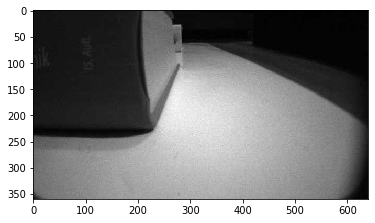

In [15]:
#image = cv2.cvtColor(np.array(imageFromVector.raw_image),cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(np.array(img),cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap="gray")
plt.show()

Bild sichern

In [5]:
safedImage = image

Bild zuschneiden

In [ ]:
maskArea = np.array([[(0, 360),(0, 100), (300, 100), (300, 360)]], dtype=np.int32)
blank = np.zeros_like(image)
mask = cv2.fillPoly(blank, maskArea, 255)
maskedImage = cv2.bitwise_and(image, mask)
plt.imshow(maskedImage)
plt.show()

Bild direkt zuschneiden

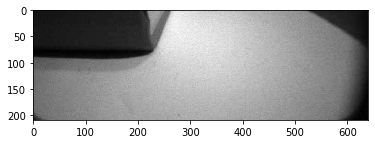

In [16]:
crop_img = image[150:360, 0:640].copy()
plt.imshow(crop_img,cmap="gray")
plt.show()

##### Kantenerkennung

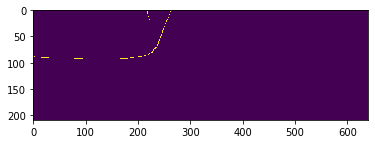

In [31]:
image_canny = cv2.Canny(crop_img,100,250,apertureSize=3)
plt.imshow(image_canny)
plt.show()

### Roboter an der Kante ausrichten

Probabilistic Hough Transformation durchführen

In [32]:
rho = 2            
theta = np.pi/180  
threshold = 50    
minLine = 50  
maxLine = 18  
lines = cv2.HoughLinesP(image_canny, rho, theta, threshold, np.array([]), minLineLength=minLine, maxLineGap=maxLine)
print(lines)
print (lines.shape)

[[[ 96  93 166  93]]

 [[234  73 263   1]]

 [[  0  88  56  91]]]
(3, 1, 4)


Vertikale Kanten entfernen

In [34]:
print(removeVerticalLines(lines)) 

[[[ 96  93 166  93]]

 [[  0  88  56  91]]]


Hough Transformation durchführen

In [ ]:
rho = 2            
theta = np.pi/180  
threshold = 50    
lines = cv2.HoughLines(image_canny, rho, theta, threshold, np.array([]))
print(lines)
img = crop_img
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)
plt.imshow(img)
plt.show()

Kanten in Bild einzeichnen

In [ ]:
imageWithLines = crop_img
for x1,y1,x2,y2 in lines[0]:
    cv2.line(imageWithLines,(x1,y1),(x2,y2),(0,255,255),2)

cv2.imwrite('houghlines5.jpg',imageWithLines)
plt.imshow(imageWithLines)
plt.show()

Roboter an der Kante zentrieren

In [ ]:
correctionFactor = 1.0

try:
    if lines[0,0,0] < 150: # turn left slightly
        robot.motors.set_wheel_motors(100 * correctionFactor, 100)

    elif lines[1,0,0] > 450: # turn right slightly
        robot.motors.set_wheel_motors(100, 100 * correctionFactor)

    else: # go straight
        robot.motors.set_wheel_motors(100, 100)
except:
    print("didnt find any")

#### TODO
- Nur Kanten im relevanten Bereich finden => Maske anpassen
- Richtige Kante identifizieren, wo kann es zu Verwechslungen kommen?
- Reaktion, wenn keine Kante mehr gefunden wurde

## Implementierung

Bildverarbeitung

In [40]:
def imageTransformation():
    imageFromVector = robot.camera.latest_image
    plt.imshow(imageFromVector.raw_image)
    plt.show()
    #image = safedImage
    image = cv2.cvtColor(np.array(imageFromVector.raw_image),cv2.COLOR_BGR2GRAY)
    crop_img = image[150:360, 0:400].copy()
    image_canny = cv2.Canny(crop_img,150,400,apertureSize=3)
    return crop_img, image_canny

In [48]:
def houghTransformation(image):
    rho = 2            
    theta = np.pi/180  
    threshold = 50    
    minLine = 60  
    maxLine = 15  
    lineArray = cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength=minLine, maxLineGap=maxLine)
    return lineArray

In [42]:
# Not tested for falling edges!
def calculateFirstEdgeLength(edge):
    width = edge[0, 0, 2] - edge[0, 0, 0] 
    height = edge[0, 0, 3] - edge[0, 0, 1] 
    diagonal = math.sqrt(width ** 2 + height ** 2)
    return diagonal

In [82]:
def printHughLines(img, lin):
    if lin is not None:
        imageWithLines = img
        dim = lin.shape[0]
        print ("Dimension of Hugh Arrays: ", dim)
        for count in range(dim):
            for x1,y1,x2,y2 in lin[0]:
                cv2.line(imageWithLines,(x1,y1),(x2,y2),(0,255,255),2)
        plt.imshow(imageWithLines)
        plt.show()

In [44]:
def removeHorizontalLines(lin):
    dim = lin.shape[0]
    newLines = lin
    linesDeleted = 0
    for count in range(dim):
        height = lin[count, 0, 3] - lin[count, 0, 1]
        if abs(height) < 20:
            newLines = np.delete(newLines, count - linesDeleted, 0)
            linesDeleted += 1
    return newLines

In [45]:
def removeVerticalLines(lin):
    dim = lin.shape[0]
    newLines = lin
    linesDeleted = 0
    for count in range(dim):
        height = lin[count, 0, 3] - lin[count, 0, 1]
        if abs(height) > 20:
            newLines = np.delete(newLines, count - linesDeleted, 0)
            linesDeleted += 1
    return newLines

In [80]:
def avoidObstacleAfterTurn():
    print ("Avoiding Obstacle after Turn!")
    robot.behavior.set_lift_height(1)
    robot.behavior.set_head_angle(degrees(-15.0))
    time.sleep(0.7)
    
    imageFromVector = robot.camera.latest_image
    plt.imshow(imageFromVector.raw_image)
    plt.show()
    image = cv2.cvtColor(np.array(imageFromVector.raw_image),cv2.COLOR_BGR2GRAY)
    crop_img = image[150:360, 0:640].copy()
    image_canny = cv2.Canny(crop_img,50,200,apertureSize=3)
    plt.imshow(image_canny)
    plt.show()
    
    linesHough = houghTransformation(image_canny)
    
    print ("Old lines: ", linesHough)
    if linesHough is not None:
        newLinesArray = removeVerticalLines(linesHough)
        print ("New lines: ", newLinesArray)
        ArrayDim = newLinesArray.size
        
        if ArrayDim > 0:
            printHughLines(crop_img, newLinesArray)
            edgeLength = calculateFirstEdgeLength(newLinesArray)
            print(edgeLength)
    else:
        ArrayDim = 0
        
    print (ArrayDim)
    
    if ArrayDim > 0: 
        robot.behavior.turn_in_place(degrees(-90))
        moveForward(3)
        robot.behavior.turn_in_place(degrees(90))
    
    robot.behavior.set_head_angle(degrees(-5.0))

Avoiding Obstacle after Turn!


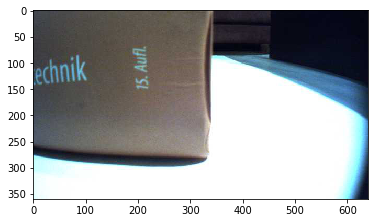

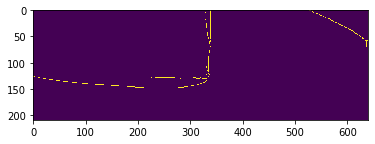

Old lines:  [[[ 66 137 227 148]]

 [[272 129 332 129]]

 [[529   0 612  40]]]
New lines:  [[[ 66 137 227 148]]

 [[272 129 332 129]]]
Dimension of Hugh Arrays:  2


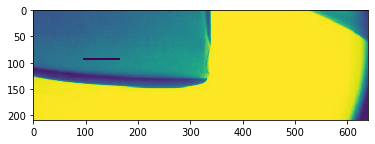

161.37533888422976
8


In [68]:
avoidObstacleAfterTurn()

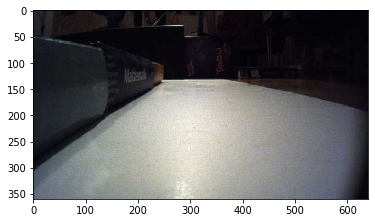

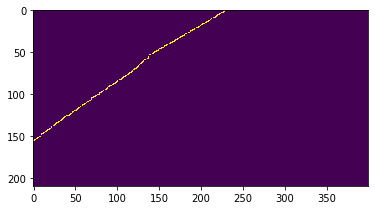

Old lines:  [[[  9 148 129  63]]

 [[137  55 228   1]]

 [[  1 155  79  98]]

 [[ 86  95 157  42]]]
New lines:  [[[  9 148 129  63]]

 [[137  55 228   1]]

 [[  1 155  79  98]]

 [[ 86  95 157  42]]]
Dimension of Hugh Arrays:  4


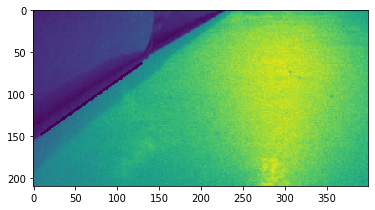

147.05441169852742
16
 ---- Edges --- 


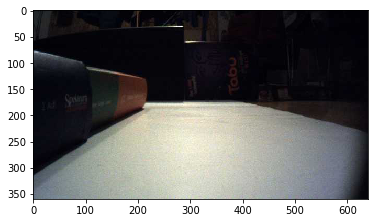

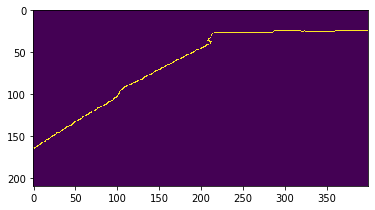

Old lines:  [[[  0 164 102 101]]

 [[320  25 399  24]]

 [[105  94 179  55]]

 [[104  95 213  37]]]
New lines:  [[[  0 164 102 101]]

 [[105  94 179  55]]

 [[104  95 213  37]]]
Dimension of Hugh Arrays:  3


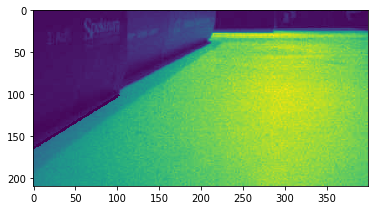

119.8874472161285
12
 ---- Edges --- 


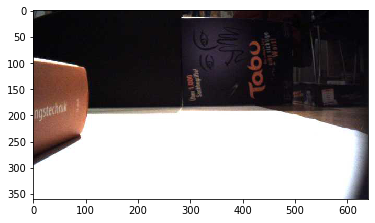

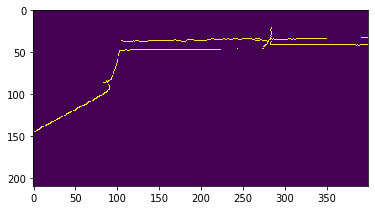

Old lines:  [[[219  35 332  34]]

 [[181  47 274  46]]

 [[277  41 399  41]]

 [[  0 145  81 102]]

 [[333  34 399  32]]

 [[105  36 176  36]]]
New lines:  [[[  0 145  81 102]]]
Dimension of Hugh Arrays:  1


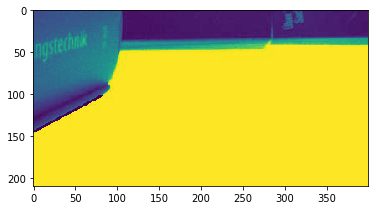

91.706052144883
4
 ---- Edges --- 


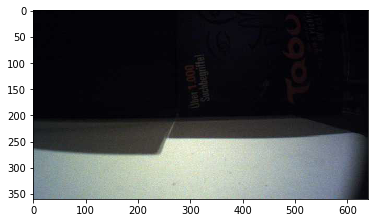

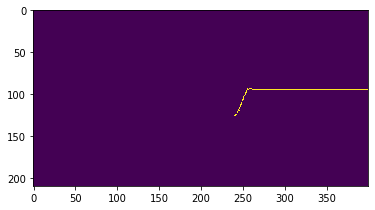

Old lines:  [[[255  94 399  94]]]
New lines:  []
0
 #### Pledge ### 


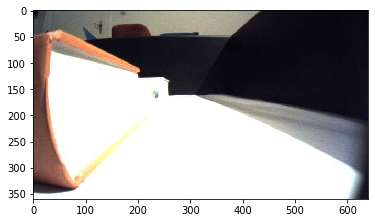

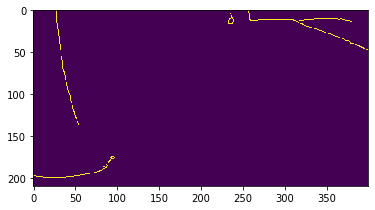

Old lines:  [[[ 35  66  50 128]]

 [[311  12 398  46]]]
New lines:  [[[ 35  66  50 128]]

 [[311  12 398  46]]]
Dimension of Hugh Arrays:  2


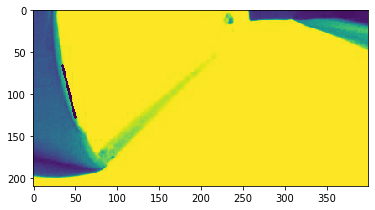

63.788713735268246
8
 ---- Edges --- 


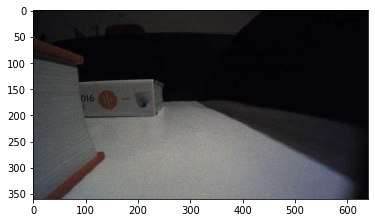

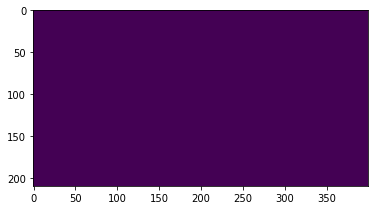

Old lines:  None
0
 #### Pledge ### 


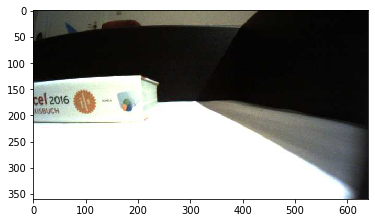

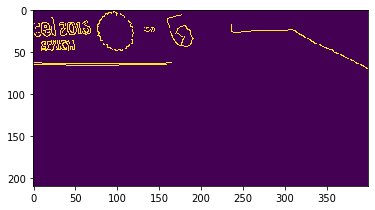

Old lines:  [[[ 11  63 158  63]]

 [[  2  20  77  22]]

 [[ 11  14  79  16]]

 [[  3  23  77  23]]

 [[ 40  66 183  64]]

 [[  2  30  78  29]]

 [[  1  15  77  18]]

 [[  1  28  78  25]]

 [[308  23 399  69]]

 [[  7  18  78  19]]

 [[  0  27  77  24]]

 [[  3  24  68  24]]

 [[ 19  29  79  26]]]
New lines:  [[[308  23 399  69]]]
Dimension of Hugh Arrays:  1


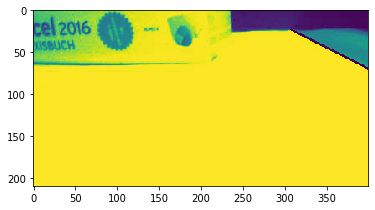

101.96568050084302
4
 ---- Edges --- 


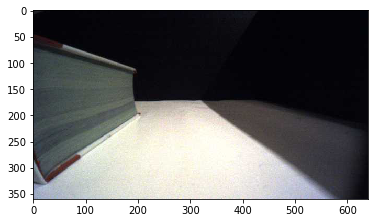

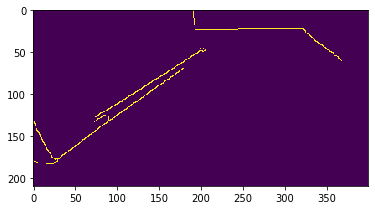

Old lines:  [[[ 20 183 178  69]]

 [[ 77 126 203  45]]

 [[193  23 304  22]]

 [[120 100 180  60]]]
New lines:  [[[ 20 183 178  69]]

 [[ 77 126 203  45]]

 [[120 100 180  60]]]
Dimension of Hugh Arrays:  3


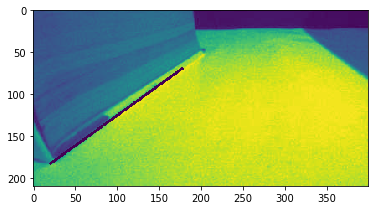

194.83326204732086
12
 ---- Edges --- 


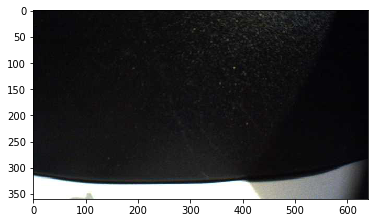

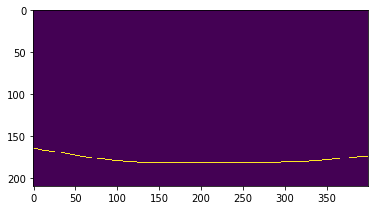

Old lines:  [[[124 181 295 181]]

 [[  0 165 110 180]]

 [[318 180 397 174]]]
New lines:  []
0
 #### Pledge ### 


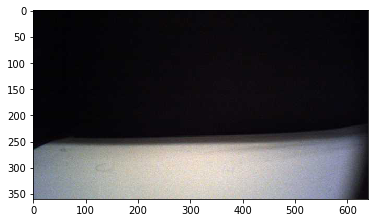

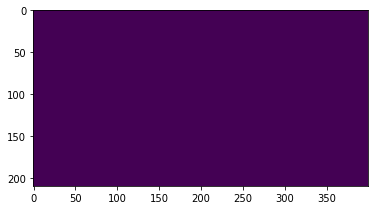

Old lines:  None
0
 #### Pledge ### 
Avoiding Obstacle after Turn!


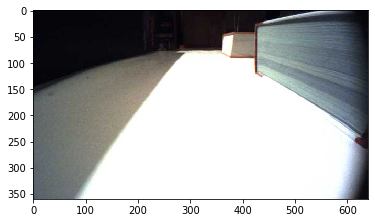

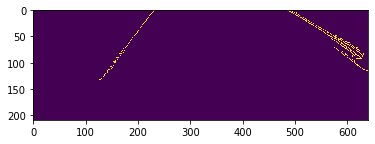

Old lines:  [[[494   1 631  83]]

 [[128 133 232   0]]

 [[486   0 591  63]]

 [[549  30 627  91]]]
New lines:  []
0


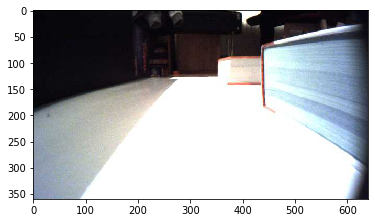

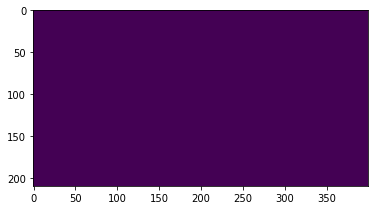

Old lines:  None
0
 #### Pledge ### 


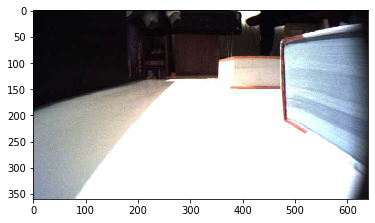

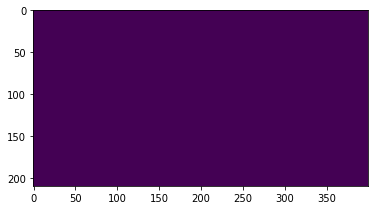

Old lines:  None
0
 #### Pledge ### 


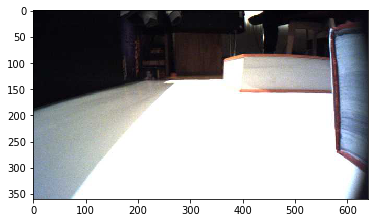

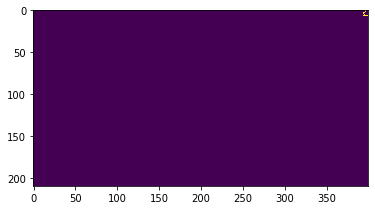

Old lines:  None
0
 #### Pledge ### 


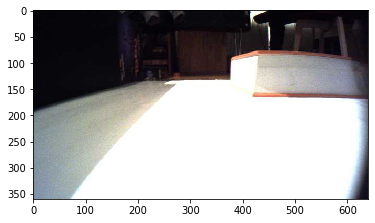

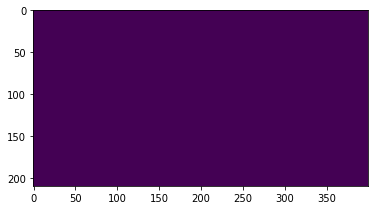

Old lines:  None
0
 #### Pledge ### 


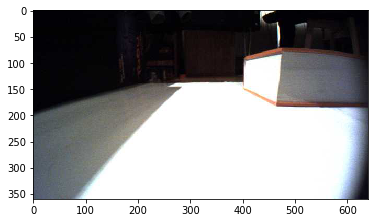

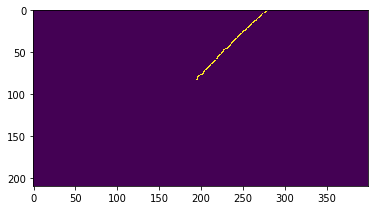

Old lines:  [[[193  83 264  12]]]
New lines:  [[[193  83 264  12]]]
Dimension of Hugh Arrays:  1


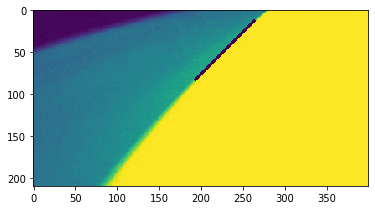

100.40916292848975
4
 ---- Edges --- 


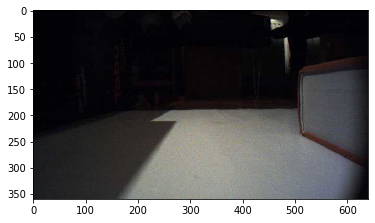

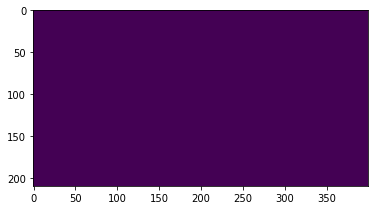

Old lines:  None
0
 #### Pledge ### 


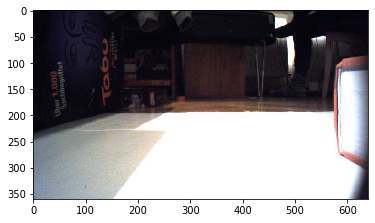

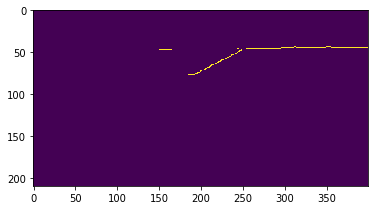

Old lines:  [[[151  47 223  46]]

 [[191  76 256  45]]

 [[296  44 367  44]]]
New lines:  [[[191  76 256  45]]]
Dimension of Hugh Arrays:  1


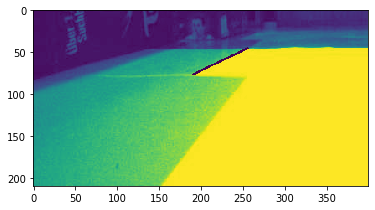

72.01388754955533
4
 ---- Edges --- 


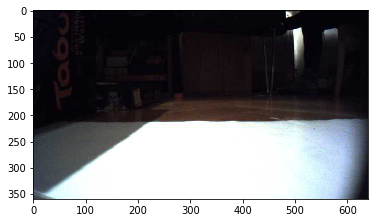

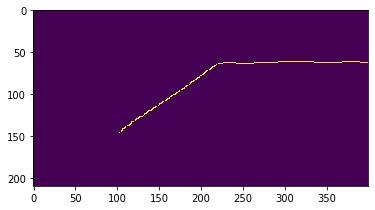

Old lines:  [[[130 127 222  63]]]
New lines:  [[[130 127 222  63]]]
Dimension of Hugh Arrays:  1


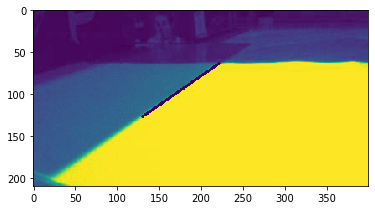

112.0714058089752
4
 ---- Edges --- 


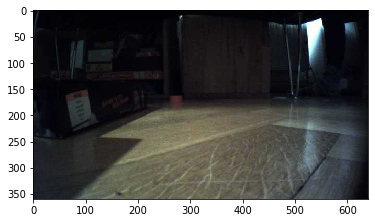

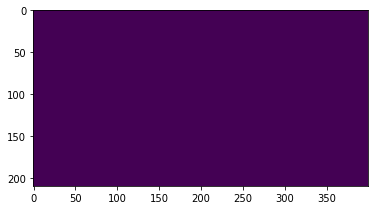

Old lines:  None
0
 #### Pledge ### 


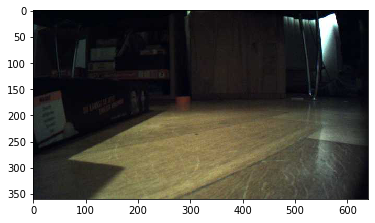

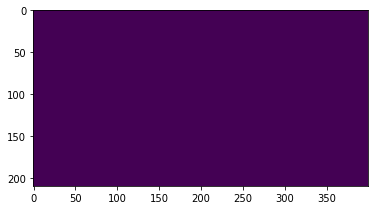

Old lines:  None
0
 #### Pledge ### 


KeyboardInterrupt: 

In [84]:
robot.behavior.set_lift_height(1)
robot.behavior.set_head_angle(degrees(-5.0))
time.sleep(1)

ArrayDim = 1

while (ArrayDim > 0):
    while not robot.camera.latest_image:
        time.sleep(1.0)
        
    time.sleep(0.7)
    imageRaw, image = imageTransformation()
    plt.imshow(image)
    plt.show()
    lines = houghTransformation(image)
    print ("Old lines: ", lines)
    if lines is not None:
        newLinesArray = removeHorizontalLines(lines)
        print ("New lines: ", newLinesArray)
        ArrayDim = newLinesArray.size
        
        if ArrayDim > 0:
            printHughLines(imageRaw, newLinesArray)
            edgeLength = calculateFirstEdgeLength(newLinesArray)
            print(edgeLength)
    else:
        ArrayDim = 0
        
    print (ArrayDim)
       
    if (ArrayDim > 0):
        print (" ---- Edges --- ")
        robot.behavior.drive_straight(distance_mm(edgeLength*2), speed_mmps(220))
    else:
        print (" #### Pledge ### ")
        pledge()
        ArrayDim = 1